In [54]:
#Optimize billionaire's utility function
import numpy as np
import scipy.optimize as scpo

def util(params):
    w,b=params
#We want to maximize utility, so we'll minimize -utility
    ufunc=(5*w-w**2)*(10*b-b**2)
    return(-ufunc)

#initial guess for parameters
init_params=[1.,0.]
#Run the minimization.
results = scpo.minimize(util,
                            init_params,
                            method='CG')
wealth, friends = results.x
print(wealth,friends)

2.5000000161329896 5.000000081064647


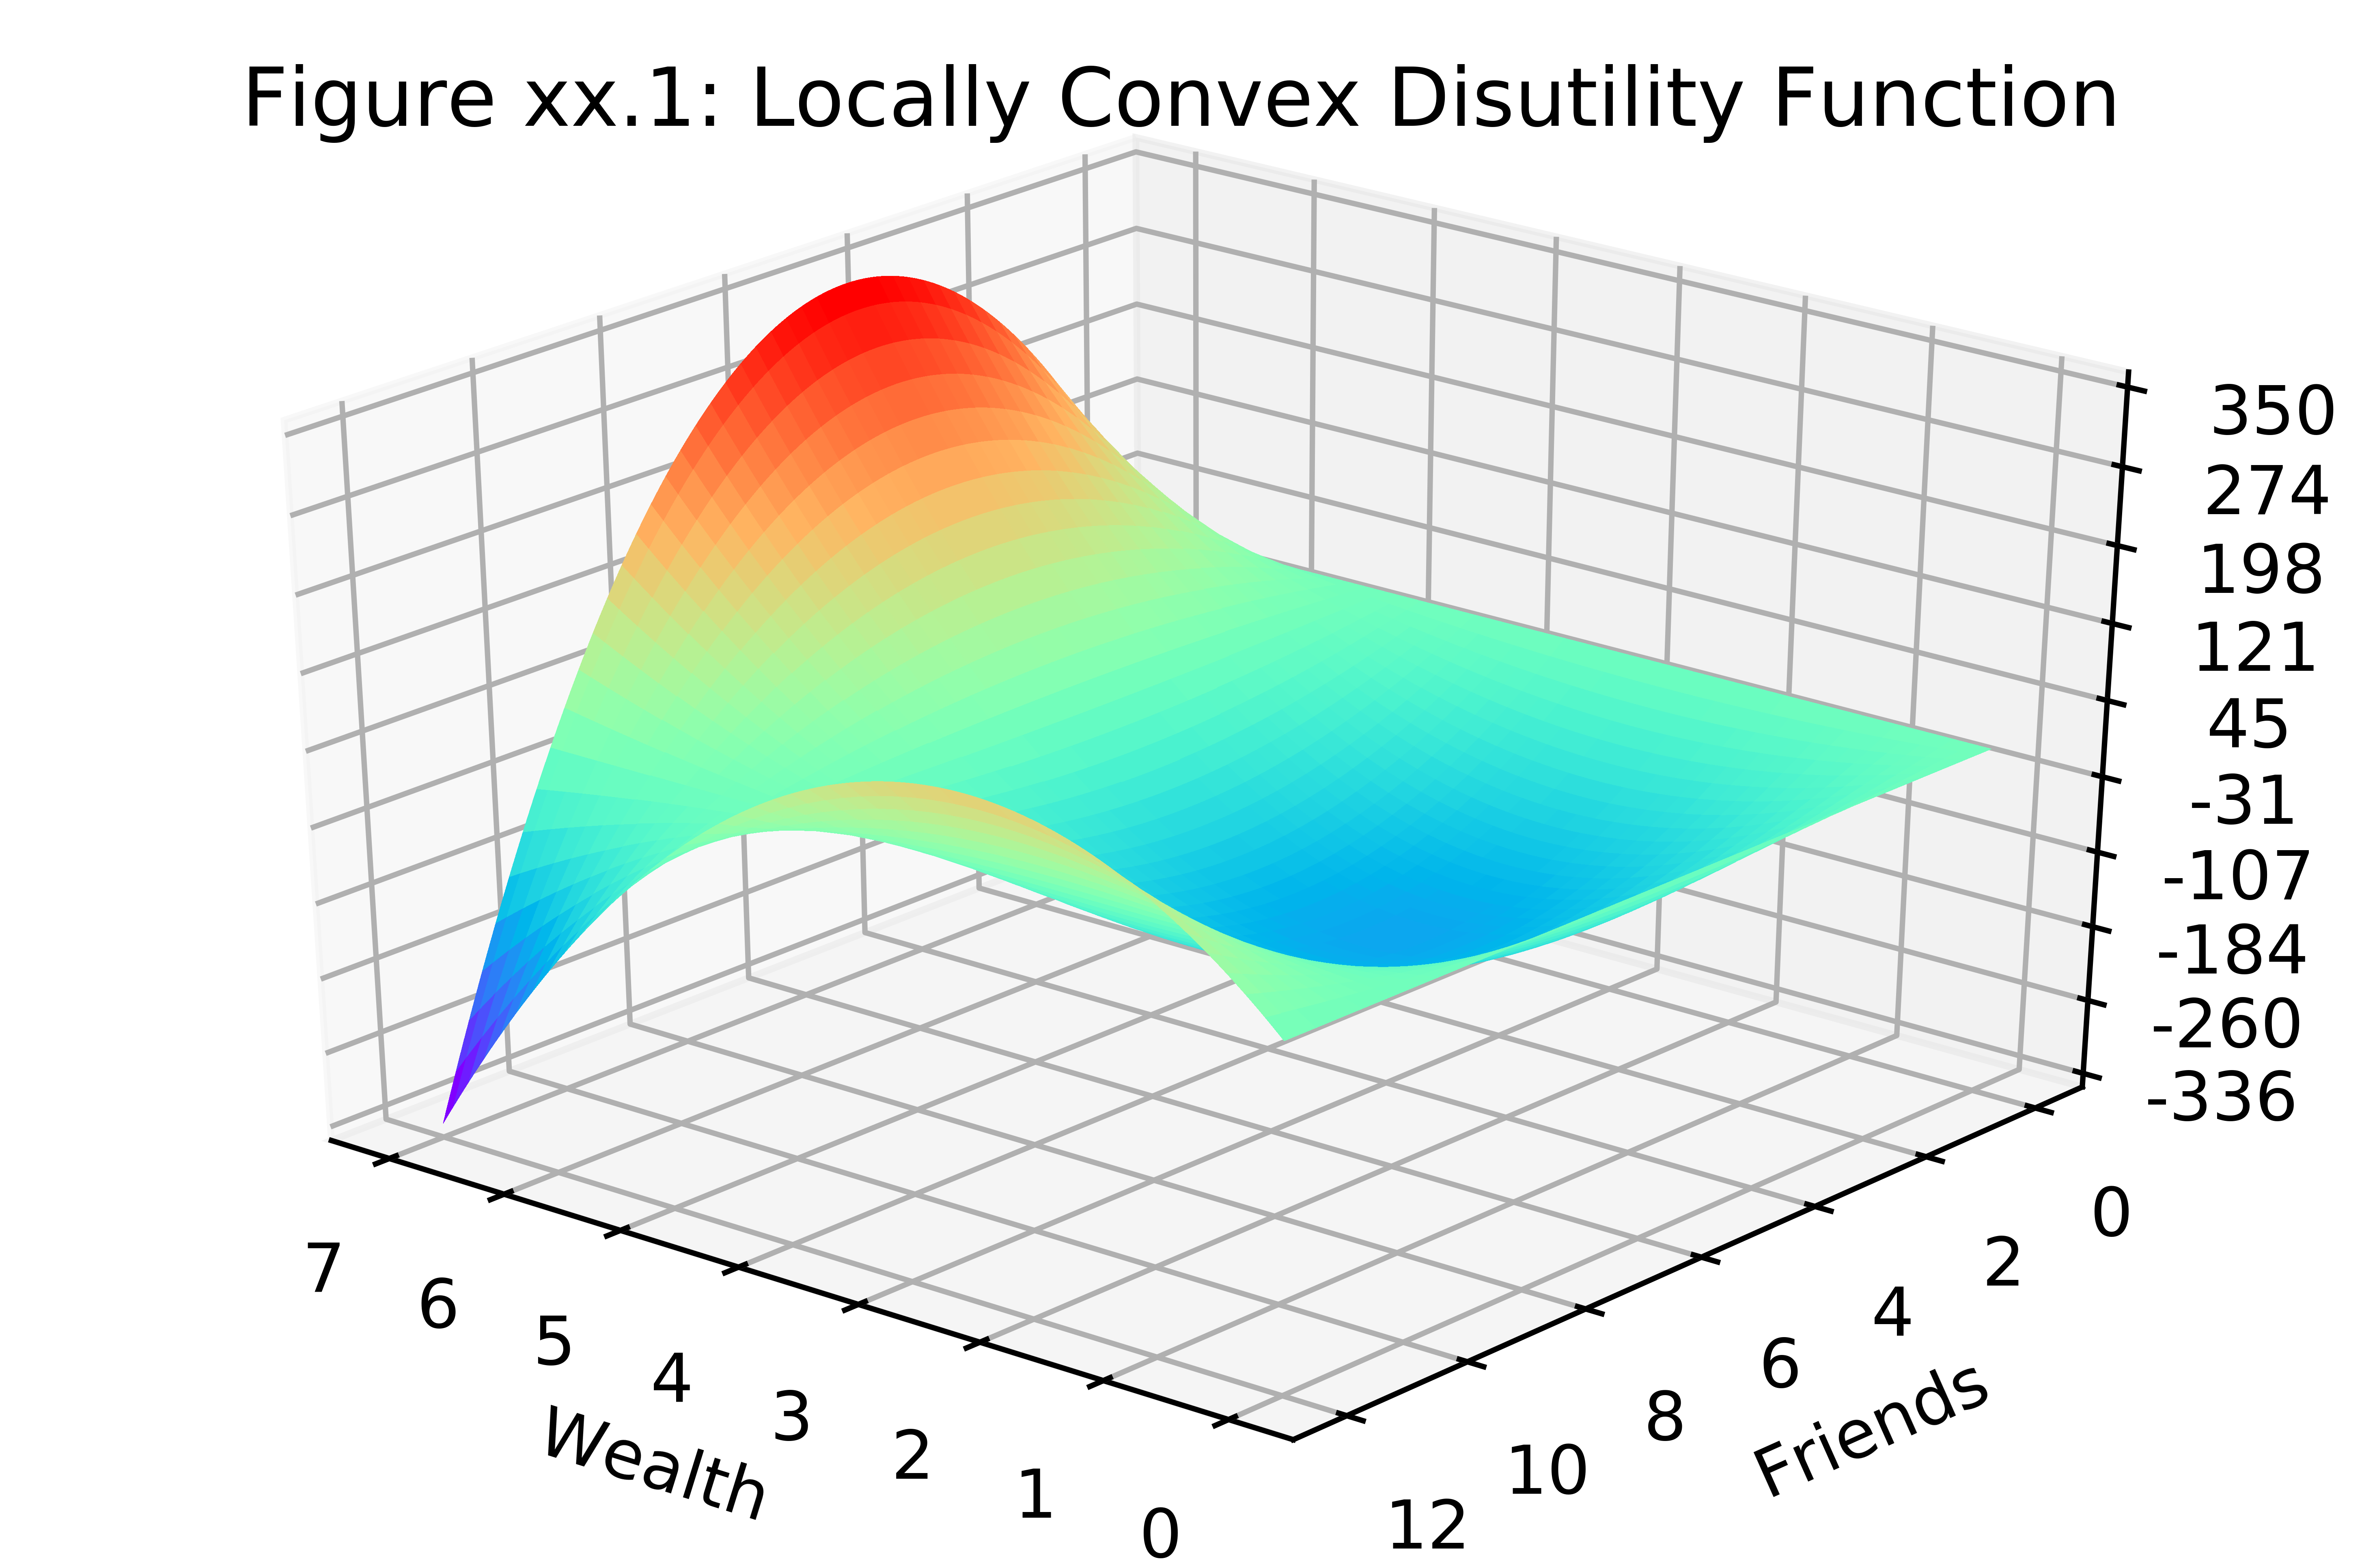

In [55]:
#Graph the utility function

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as spst
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#draw surface
fig = plt.figure(dpi=1200)
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.,7.05,.05)
Y = np.arange(0.,12.05,.05)
X, Y = np.meshgrid(X, Y)
Z = util([X,Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
    linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.view_init(ax.elev, ax.azim-170)

#Label axes
ax.set_xlabel('Wealth')
ax.set_ylabel('Friends')
ax.set_zlabel('Utility')

s_title="Figure xx.1: Locally Convex Disutility Function"
plt.title(s_title)

plt.show();

In [57]:
#Gradient descent method for log(sum(exp(ai'x+bi))) objective function

#Problem parameters
n=2; m=3   #variables, components of sum
a=np.zeros((m,n))
a[0]=[1,3]
a[1]=[1,-3]
a[2]=[-1,0]
b=[-.1,-.1,-.1]
def objfunc(x):
    sumexps=0
    for i in range(m):
        sumexps+=np.exp(np.matmul(a[i],x)+b[i])
    return(np.log(sumexps))

#gradient of this objective function
def gradfunc(x):
    gradvec=np.zeros(n)
    for i in range(m):
        gradvec+=np.exp(np.matmul(a[i],x)+b[i])*a[i]
    sumexps=np.exp(objfunc(x))
    return(gradvec/sumexps)

def gradientmethod(xinit,objfunc,gradfunc):
#Gradient descent method
    #Starting point
    x=xinit
    print(x[0])
    iteration=0

    print("Objective function at initial point:",objfunc(x[0]))
    print("Gradient at initial point:",gradfunc(x[0]))

    #Parameters for backtracking
    alpha=.25
    beta=.75
    epsilon=10**(-8)
    maxiter=200

    #Iterate as long as necessary
    while True:
        deltax=-gradfunc(x[iteration])
        delta=1

        #Backtracking
        current_obj=objfunc(x[iteration])
        grad_squared=np.matmul(deltax,deltax)
        print(iteration," obj:",current_obj, \
              " grad^2:",grad_squared)
        if grad_squared < epsilon:
            break     #Done

        while True:
            y=x[iteration]+delta*deltax
            new_obj=objfunc(y)
            if new_obj > current_obj-delta*alpha*grad_squared:
                delta*=beta
            else:
                break   #Backtracking done

        print("Delta from backtracking:",delta)
        x.append(y)
        iteration+=1
        if iteration > maxiter:
            break
    return(x)

#Starting point
xinit=[[1]*n]
x=gradientmethod(xinit,objfunc,gradfunc)

print("optimal x",x[-1])
print("optimal objective",objfunc(x[-1]))
print("gradient",gradfunc(x[-1]))

[1, 1]
Objective function at initial point: 3.9091744845917344
Gradient at initial point: [0.98664717 2.96523407]
0  obj: 3.9091744845917344  grad^2: 9.766085755759544
Delta from backtracking: 0.5625
1  obj: 2.4198033815320388  grad^2: 8.332277507974277
Delta from backtracking: 0.31640625
2  obj: 1.1913420057936328  grad^2: 1.8085316901135995
Delta from backtracking: 0.2373046875
3  obj: 1.0371266525499625  grad^2: 0.4614786912439445
Delta from backtracking: 0.31640625
4  obj: 0.9938110971753488  grad^2: 0.3000411969185903
Delta from backtracking: 0.31640625
5  obj: 0.9663931514449048  grad^2: 0.15240881861624547
Delta from backtracking: 0.31640625
6  obj: 0.9513765394485699  grad^2: 0.06234346749137583
Delta from backtracking: 0.31640625
7  obj: 0.9444446348940022  grad^2: 0.021872767145336577
Delta from backtracking: 0.31640625
8  obj: 0.9416102287070497  grad^2: 0.007142149956239447
Delta from backtracking: 0.421875
9  obj: 0.9406337475243942  grad^2: 0.005013547563411474
Delta from

In [58]:
# Use Newton's method to optimize the previous function

def hessfunc(x):
    #Hessian function computed by differencing gradient
    hessmatrix=np.zeros((n,n))
    for i in range(n):
        deltai=np.zeros(n)
        deltai[i]=epsilon
        xx=np.array(x)
        hessmatrix[i]=(gradfunc(xx+deltai)-gradfunc(xx))/epsilon
    return(hessmatrix)

def newtonmethod(xinit,objfunc,gradfunc,hessfunc):
#Run Newton's Method with calls to objfunc, gradfunc, and hessfunc
    #Starting point
    x=xinit
    print(x[0])
    iteration=0

    print("Objective function at initial point:",objfunc(x[0]))
    print("Gradient at initial point:",gradfunc(x[0]))
    print("Hessian at initial point:",hessfunc(x[0]))
    print("Inverse Hessian initial:",np.linalg.inv(hessfunc(x[0])))

    #Parameters for backtracking
    alpha=.25
    beta=.75
    epsilon=10**(-8)
    maxiter=100

    #Iterate as long as necessary
    while True:
        deltax=-np.matmul(np.linalg.inv(hessfunc(x[iteration])), \
                          gradfunc(x[iteration]))
        delta=1

        #Backtracking
        current_obj=objfunc(x[iteration])
        grad_hessinv_grad=np.matmul(gradfunc(x[iteration]),deltax)
        print(iteration," obj:",current_obj, \
              " grad_hessinv_grad:",-grad_hessinv_grad)
        if -grad_hessinv_grad < epsilon:
            break     #Done

        while True:
            y=x[iteration]+delta*deltax
            new_obj=objfunc(y)
            if new_obj > current_obj+delta*alpha*grad_hessinv_grad:
                delta*=beta
            else:
                break   #Backtracking done

        y=x[iteration]+delta*deltax
        print(delta,y)
        x.append(y)
        iteration+=1
        if iteration > maxiter:
            break
    #x has the x vector for each iteration, with the last one
    #being the optimal (or last if ran out of iterations)
    return(x) 
            
xinit=[[1]*n]
x=newtonmethod(xinit,objfunc,gradfunc,hessfunc)
    
print("optimal x:",x[-1])
print("iterations:",len(x)-1)
print("optimal objective:",objfunc(x[-1]))
print("gradient:",gradfunc(x[-1]))
print("Hessian",hessfunc(x[-1]))


[1, 1]
Objective function at initial point: 3.9091744845917344
Gradient at initial point: [0.98664717 2.96523407]
Hessian at initial point: [[0.02664535 0.03907985]
 [0.03952394 0.14699353]]
Inverse Hessian initial: [[ 61.9675539  -16.47475753]
 [-16.66197069  11.23278923]]
0  obj: 3.9091744845917344  grad_hessinv_grad: 62.14315694807845
0.1001129150390625 [-0.23024753 -0.688741  ]
1  obj: 1.9321892071709894  grad_hessinv_grad: 5.31740377874628
0.2373046875 [0.54885726 0.0465899 ]
2  obj: 1.304633417711735  grad_hessinv_grad: 1.0598271209921246
0.75 [-0.5503213   0.02597341]
3  obj: 0.9615480058423379  grad_hessinv_grad: 0.045257631561375036
1 [-0.33873134 -0.00660025]
4  obj: 0.9398503054896591  grad_hessinv_grad: 0.00025756011050464135
1 [-3.46477621e-01 -5.05071402e-05]
5  obj: 0.939720781185167  grad_hessinv_grad: 2.0689094390285585e-08
1 [-3.46573586e-01 -6.82946902e-09]
6  obj: 0.939720770839918  grad_hessinv_grad: 2.2741216246323976e-16
optimal x: [-3.46573586e-01 -6.82946902e-0

In [ ]:
# Use built-in scipy.optimize function to minimize
# the previous function

#initial guess for parameters
init_params=[1.]*n
#Run the minimization.
results = scpo.minimize(objfunc,
                            init_params, jac=gradfunc, 
                            method='CG')
print(results.x)
print(objfunc(results.x),gradfunc(results.x))

In [59]:
import pandas as pd
import qrbook_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)

#Convert levels to log-returns
#First take logs of the currency levels
#Currency exchange rates are usually expressed in the direction
#that will make the rate > 1
#Swissie and yen are in currency/dollar, but
#pounds is in dollar/currency. Reverse signs
#so everything is in dollar/currency

#Do each currency separately to account for separate missing data patterns
#dlgs is a list of lists of length 3 corresponding to the 3 currencies
#The value in dlgs is nan if there is missing data for the present or previous day's observation
#Otherwise it is the log of today/yesterday
multipliers=[-1,1,-1]
dlgs=[]
for i in range(len(multipliers)):
    lgrates=[]
    previous=-1
    for t in range(len(ratematrix)):
        if pd.isna(ratematrix[t][i]) or ratematrix[t][i]<=0:
            lgrates.append(np.nan)    #Append a nan
        else:
            if previous < 0:    #This is the first data point
                lgrates.append(np.nan)
            else:
                lgrates.append(np.log(ratematrix[t][i]/previous)*multipliers[i])
            previous=ratematrix[t][i]
    dlgs.append(lgrates)

#dlgs is the transpose of what we want - flip it
dlgs=np.transpose(dlgs)

#Delete any time periods that don't have data
lgdates=[]
difflgs=[]
for t in range(len(dlgs)):
    if all(pd.notna(dlgs[t])):
        #include this time period
        difflgs.append(dlgs[t])
        lgdates.append(cdates[t])

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)



In [60]:
#Do the optimization:
#minimize -1/2*w'Cw
#Subject to w'u=1
#           sum(wi^2)<= k
#where w is n-vector, u is unit n-vector

#Change to unconstrained barrier function where
# w=w0+Nx, x an n-1 vector.
#w0 is vector of all zeroes except for 1 in nth place
#N is nx(n-1) matrix with (n-1)x(n-1) identity matrix I(n-1) in first
#n-1 rows, -u(n-1) in last row (u(n-1) unit vector of size n-1)
#This gives function to be minimized over x:
# f(x)=omega*(1/2)*(x'Fx+x'N'Cw0)+log(k-(u(n-1)'x-1)^2-x'x)

def barrierfunc(x):
    #Create N matrix
    n=len(x)+1
    nmatrix=np.vstack([np.identity(n-1),[-1]*(n-1)])
    #Create w0 vector
    w0=[0]*(n-1)+[1]
    #Create F matrix = N'CN
    #C multiplied by 10000 for numerical accuracy - otherwise
    #quantities are very small
    fmatrix=np.matmul(np.matrix.transpose(nmatrix),np.matmul(10000*c,nmatrix))
    #First part of objective function 1/2*x'Cx
    objfunction=np.matmul(x,np.matmul(fmatrix,x))/2.
    #Second part of objective function w0'CNx
    objfunction+=np.matmul(np.matmul(w0,np.matmul(10000*c,nmatrix)),x)
    #Multiply non-barrier part by omega
    objfunction*=omega
    #Add in barrier
    u_times_x=np.matmul([1]*(n-1),x)
    arglog=k_parameter-(u_times_x-1)**2-np.matmul(x,x)
    if arglog <= 0:
        print("Negative argument to log:",arglog)
        return(-arglog/epsilon)
    objfunction-=np.log(arglog)
    return(objfunction)

def barriergrad(x):
    #Take gradient of barrier function by differencing
    n=len(x)
    bf_x=barrierfunc(x)
    gradvec=np.array([-bf_x]*n)
    for i in range(n):
        little_vec=np.zeros(n)
        little_vec[i]=epsilon
        gradvec[i]+=barrierfunc(np.add(x,little_vec))
    gradvec/=epsilon
    return(gradvec)

#Run barrier algorithm
i=0
alpha=10
omega=10
epsilon=10**(-12)
k_parameter=.4
xinit=[1/2,1/4]
iter_barrier=1

while True:

    x=gradientmethod([xinit],barrierfunc,barriergrad)
    
    print("barrier iteration ",iter_barrier)
    print("optimal x:",x[-1])
    print("iterations:",len(x)-1)
    print("optimal objective:",barrierfunc(x[-1]))
    print("gradient:",barriergrad(x[-1]))

    if iter_barrier == 5:
        break   #Done
        
    #Keep going with a bigger omega
    #Use solution as initial guess for next pass
    xinit=x[-1]
    iter_barrier+=1
    omega*=alpha
    

[0.5, 0.25]
Objective function at initial point: 3.1626796822834025
Gradient at initial point: [ 2.13384865e+01 -3.10862447e-03]
0  obj: 3.1626796822834025  grad^2: 455.33101719517987
Negative argument to log: -899.8351244409764
Negative argument to log: -504.14583688555285
Negative argument to log: -282.0707334137511
Negative argument to log: -157.52857829445574
Negative argument to log: -87.75493397754691
Negative argument to log: -48.71824750255681
Negative argument to log: -26.91835270032821
Negative argument to log: -14.77459287903962
Negative argument to log: -8.032738733288536
Negative argument to log: -4.307203841596365
Negative argument to log: -2.2616590139891275
Negative argument to log: -1.148591460187263
Negative argument to log: -0.5506545199691203
Negative argument to log: -0.23543766019296852
Negative argument to log: -0.07397017839129859
Delta from backtracking: 0.00751694681821391
1  obj: 2.2459055204153335  grad^2: 46.5599882091908
Negative argument to log: -117.8165

61  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
62  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
63  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
64  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
65  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
66  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
67  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
68  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
69  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
70  obj: 1.9928104087249434  grad^2: 

156  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
157  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
158  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
159  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
160  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
161  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
162  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
163  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
164  obj: 1.9928104087249434  grad^2: 8.085824278515372e-06
Delta from backtracking: 1.0159246543653796e-14
165  obj: 1.9928104087249434

Delta from backtracking: 4.2907715975490553e-16
23  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
24  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
25  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
26  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
27  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
28  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
29  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
30  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
31  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-1

Delta from backtracking: 4.2907715975490553e-16
112  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
113  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
114  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
115  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
116  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
117  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
118  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
119  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
120  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975

Delta from backtracking: 4.2907715975490553e-16
200  obj: -77.27773117958401  grad^2: 0.001009741958682895
Delta from backtracking: 4.2907715975490553e-16
barrier iteration  3
optimal x: [0.15402799 0.44934747]
iterations: 201
optimal objective: -77.27773117958401
gradient: [0.02842171 0.01421085]
[0.15402799 0.44934747]
Objective function at initial point: -809.4211210215311
Gradient at initial point: [256.25013222 -55.59286365]
0  obj: -809.4211210215311  grad^2: 68754.6967534336
Negative argument to log: -109148.21196547862
Negative argument to log: -61420.27292626772
Negative argument to log: -34567.20442781445
Negative argument to log: -19457.77630576164
Negative argument to log: -10955.290168352301
Negative argument to log: -6170.067101993576
Negative argument to log: -3476.4481666173097
Negative argument to log: -1959.8392950560487
Negative argument to log: -1105.660639493756
Negative argument to log: -624.3705217581535
Negative argument to log: -353.03386254551765
Negative argu

Delta from backtracking: 2.413559023621343e-16
21  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
22  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
23  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
24  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
25  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.00141588285279

Delta from backtracking: 2.413559023621343e-16
69  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
70  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
71  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
72  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
73  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.00141588285279

Delta from backtracking: 2.413559023621343e-16
110  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
111  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
112  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
113  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
114  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882

Delta from backtracking: 2.413559023621343e-16
153  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
154  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
155  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
156  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
157  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882

Delta from backtracking: 2.413559023621343e-16
197  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
198  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
199  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
200  obj: -814.5993384825226  grad^2: 0.012924697071141057
Negative argument to log: -0.009181720198311316
Negative argument to log: -0.001415882852796757
Delta from backtracking: 2.413559023621343e-16
barrier iteration  4
optimal x: [0.12965168 0.46634112]
iterations: 201
optimal objective: -814.5993384825226
gradient: [0.         0.11368684]
[

Negative argument to log: -2214.2163111651494
Negative argument to log: -1242.6663719262215
Negative argument to log: -696.8770798260839
Negative argument to log: -390.4012645610762
Negative argument to log: -218.40661463049895
Negative argument to log: -121.95812116154164
Negative argument to log: -67.92971642299732
Negative argument to log: -37.70664338587429
Negative argument to log: -20.832093273723707
Negative argument to log: -11.434605189062342
Negative argument to log: -6.2193529065078295
Negative argument to log: -3.3388995713715426
Negative argument to log: -1.758489125707852
Negative argument to log: -0.8993916665348792
Negative argument to log: -0.43856190813472223
Negative argument to log: -0.19615459082311376
Negative argument to log: -0.07240754117669396
Negative argument to log: -0.012255125506602793
Delta from backtracking: 3.185559317401524e-07
11  obj: -8206.320784167503  grad^2: 20441.287297410418
Negative argument to log: -21350.319100124114
Negative argument to lo

Negative argument to log: -36.2558628014454
Negative argument to log: -20.064329899600388
Negative argument to log: -11.038962854442918
Negative argument to log: -6.023971550639597
Negative argument to log: -3.249372186573549
Negative argument to log: -1.7234099775288871
Negative argument to log: -0.8911186848731314
Negative argument to log: -0.442501670203169
Negative argument to log: -0.20481472753799052
Negative argument to log: -0.08211091835383405
Negative argument to log: -0.021336347736500894
Delta from backtracking: 4.247412423202032e-07
21  obj: -8206.350808856698  grad^2: 11994.118882018902
Negative argument to log: -12127.734944205742
Negative argument to log: -6831.394211357125
Negative argument to log: -3849.8166922236246
Negative argument to log: -2170.889945031415
Negative argument to log: -1225.1516052260863
Negative argument to log: -692.1672557033052
Negative argument to log: -391.60865906002806
Negative argument to log: -221.9782734206502
Negative argument to log: -1

Negative argument to log: -8396.246714673245
Negative argument to log: -4717.761139780174
Negative argument to log: -2649.894884886187
Negative argument to log: -1487.681527245843
Negative argument to log: -834.6575716262926
Negative argument to log: -467.87239013015255
Negative argument to log: -261.96132069346663
Negative argument to log: -146.44054050150055
Negative argument to log: -81.68824891814688
Negative argument to log: -45.43619535848089
Negative argument to log: -25.172748073146604
Negative argument to log: -13.870808606629438
Negative argument to log: -7.585654880326064
Negative argument to log: -4.104396326989815
Negative argument to log: -2.186793704020224
Negative argument to log: -1.1385962135613643
Negative argument to log: -0.5718256138994087
Negative argument to log: -0.2701475181304226
Negative argument to log: -0.11330136416601622
Negative argument to log: -0.03471123374027374
Delta from backtracking: 4.247412423202032e-07
35  obj: -8206.367960402951  grad^2: 5571

46  obj: -8206.373154078155  grad^2: 2173.830649789357
Negative argument to log: -5754.712233477735
Negative argument to log: -3232.84109767759
Negative argument to log: -1815.334688637939
Negative argument to log: -1018.7719121890837
Negative argument to log: -571.2937844135636
Negative argument to log: -320.0286630225542
Negative argument to log: -179.02302635215204
Negative argument to log: -99.95560130908135
Negative argument to log: -55.6663589103769
Negative argument to log: -30.893298202122782
Negative argument to log: -17.063180159492696
Negative argument to log: -9.362285214835406
Negative argument to log: -5.089441649207283
Negative argument to log: -2.730149524097665
Negative argument to log: -1.436184489140656
Negative argument to log: -0.7331817460402019
Negative argument to log: -0.35638214484334474
Negative argument to log: -0.15841195051797274
Negative argument to log: -0.05753840222084683
Negative argument to log: -0.008660545811885023
Delta from backtracking: 4.247412

Negative argument to log: -0.2559766265128949
Negative argument to log: -0.10350680414635255
Negative argument to log: -0.027833902574580183
Delta from backtracking: 4.247412423202032e-07
59  obj: -8206.375580902073  grad^2: 1144.8179677733901
Negative argument to log: -1215.5234425149195
Negative argument to log: -687.0629784079783
Negative argument to log: -388.97117746258664
Negative argument to log: -220.66994701687594
Negative argument to log: -125.53206058071778
Negative argument to log: -71.66566622754439
Negative argument to log: -41.10231947925854
Negative argument to log: -23.71281198987839
Negative argument to log: -13.782995319500028
Negative argument to log: -8.086309411710678
Negative argument to log: -4.798550565553032
Negative argument to log: -2.8866564473197514
Negative argument to log: -1.7643186803613276
Negative argument to log: -1.0978306923580623
Negative argument to log: -0.6965514535393613
Negative argument to log: -0.45104707252869386
Negative argument to log:

Negative argument to log: -0.0008941298350612359
Negative argument to log: -0.0006027814102965989
Negative argument to log: -0.00038480676152774507
Negative argument to log: -0.00022162765171607202
Negative argument to log: -9.941312503772282e-05
Negative argument to log: -7.847745724237631e-06
Delta from backtracking: 4.247412423202032e-07
72  obj: -8206.37659489467  grad^2: 191.9059021123024
Negative argument to log: -516.3664314437024
Negative argument to log: -289.2538550920982
Negative argument to log: -161.8035677104411
Negative argument to log: -90.3381836703492
Negative argument to log: -50.30795710686513
Negative argument to log: -27.917743634206076
Negative argument to log: -15.418340282810904
Negative argument to log: -8.458744692882783
Negative argument to log: -4.597461269971962
Negative argument to log: -2.4656061669024334
Negative argument to log: -1.2965252881641811
Negative argument to log: -0.6614830064276822
Negative argument to log: -0.32119600736622733
Negative arg

Negative argument to log: -0.006475711739711648
Negative argument to log: -0.004741308450889242
Negative argument to log: -0.003462001148410554
Negative argument to log: -0.00251461170137926
Negative argument to log: -0.0018108708203839752
Negative argument to log: -0.0012868908370439192
Negative argument to log: -0.0008960577930798852
Negative argument to log: -0.0006041434783488897
Negative argument to log: -0.0003858886306866427
Negative argument to log: -0.00022258049465712082
Negative argument to log: -0.00010031482997585606
Negative argument to log: -8.73676496912501e-06
Delta from backtracking: 5.663216564269376e-07
86  obj: -8206.376979861705  grad^2: 135.65762045869656
Negative argument to log: -399.5166648479522
Negative argument to log: -223.9504066294964
Negative argument to log: -125.38878686191798
Negative argument to log: -70.09367610288228
Negative argument to log: -39.099526571095126
Negative argument to log: -21.747330162092645
Negative argument to log: -12.0482292089

Negative argument to log: -0.023034881868919665
Negative argument to log: -0.01654517654797455
Negative argument to log: -0.011968720603905775
Negative argument to log: -0.008699966609589271
Negative argument to log: -0.006340419343452863
Negative argument to log: -0.004622519148001075
Negative argument to log: -0.0033632091443720202
Negative argument to log: -0.002435103909564973
Negative argument to log: -0.0017482371966617838
Negative argument to log: -0.0012382690319105438
Negative argument to log: -0.0008587077101806784
Negative argument to log: -0.0005756762949145899
Negative argument to log: -0.00036432499498254
Negative argument to log: -0.00020633029213720788
Negative argument to log: -8.81260743115786e-05
Delta from backtracking: 5.663216564269376e-07
100  obj: -8206.377100815458  grad^2: 3.3087224502121106
Negative argument to log: -5.602673117216616
Negative argument to log: -2.9611678819150002
Negative argument to log: -1.5228762324267138
Negative argument to log: -0.74950

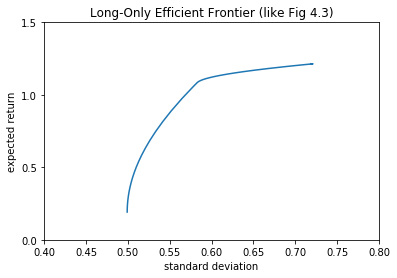

In [61]:
# Modified from cvxopt - originally for Figure 4.12 in Boyd
# and Vandenberghe book.

from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

n = 3
S = matrix(c)
pbar = matrix(m)

G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ sqrt(dot(x, S*x)) for x in xs ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(np.multiply(100.,risks), np.multiply(10000.,returns))
    pylab.xlabel('standard deviation')
    pylab.ylabel('expected return')
    pylab.axis([0.4, 0.8, 0, 1.5])
    pylab.title('Long-Only Efficient Frontier (like Fig 4.3)')
    pylab.yticks([0.0, 0.5, 1.0, 1.5])
    pylab.show()